# 캐글 자전거 대여 수요 예측

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)
bike_df=pd.read_csv("C:/Users/MYCOM/data/bikesharingdemand.csv")
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)
bike_df['year']=bike_df.datetime.apply(lambda x:x.year)
bike_df['month']=bike_df.datetime.apply(lambda x:x.month)
bike_df['day']=bike_df.datetime.apply(lambda x:x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x:x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [5]:
# datetime 칼럼 삭제
drop_columns=['datetime','casual','registered']
bike_df.drop(drop_columns,axis=1,inplace=True)

In [10]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
# RMSE (오류 값에 대한 로그 값) 성능 평가 함수 직접 만들기
# log값 변환시 NAN 등의 이슈로 log가 아닌 log1p 이용
def rmsle(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y-log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_squared_error를 이용해 RMSE rPtks
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))
# MSE,RMSE,RMSLE 모두 계산
def evaluate_regr(y,pred):
    rmsle_val=rmsle(y,pred)
    rmse_val=rmse(y,pred)
    mae_val=mean_absolute_error(y,pred)
    print('RMSLE {0:.3f}, RMSE {1:.3F}, MAE {2:.3F}'.format(rmsle_val,rmse_val,mae_val))

        

In [11]:
# 정규 분포 확인
# 카테고리형 회귀 모델 인코딩
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
y_target=bike_df['count']
X_features=bike_df.drop(['count'],axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=0)
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)
evaluate_regr(y_test,pred)

RMSLE 1.165, RMSE 140.900, MAE 105.924


In [13]:
# 실제값과 예측값이 얼마나 차이가 나는지 dataframe 칼럼으로 만들어서 오류가 가장 큰 순으로 
def get_top_error(y_test,pred,n_tops=5):
    result_df=pd.DataFrame(y_test.values,columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
    print(result_df.sort_values('diff',ascending=False)[:n_tops])

get_top_error(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

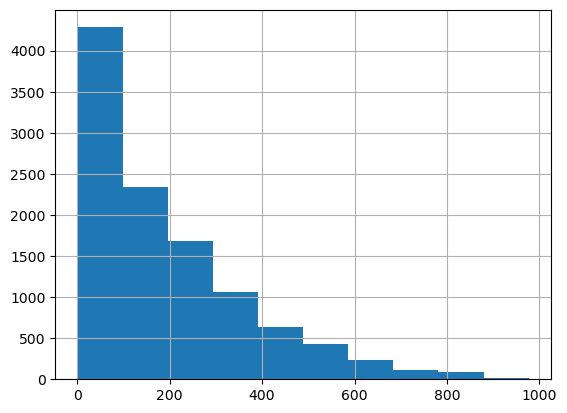

In [15]:
y_target.hist()

<AxesSubplot:>

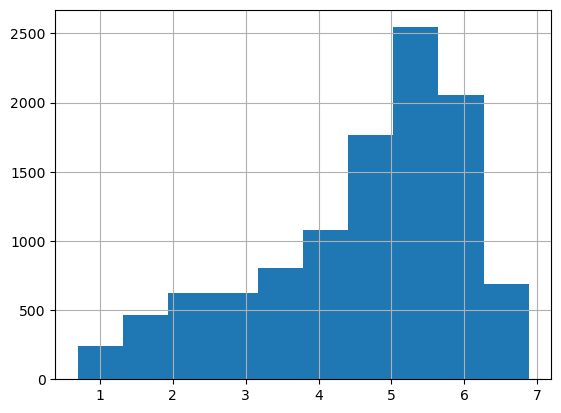

In [16]:
# 정규분포가 아닌 왜곡되어 있음
# 로그 변환하기
y_log_transform=np.log1p(y_target)
y_log_transform.hist()

In [17]:
y_target_log=np.log1p(y_target)
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target_log,test_size=0.3,random_state=0)
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)
# 다시 원래 스케일로 변환
y_test_exp=np.expm1(y_test)
pred_exp=np.expm1(pred)
evaluate_regr(y_test_exp,pred_exp)

RMSLE 1.017, RMSE 162.594, MAE 109.286


<AxesSubplot:>

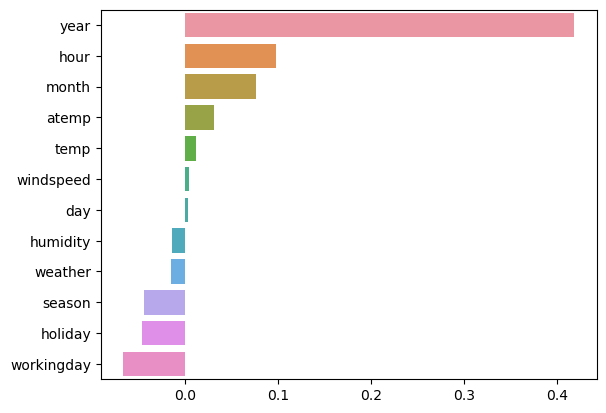

In [18]:
coef=pd.Series(lr_reg.coef_,index=X_features.columns)
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [19]:
#  카테고리형-원핫인코딩 적용
X_features_ohe=pd.get_dummies(X_features,columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_features_ohe,y_target_log,test_size=0.3,random_state=0)
def get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=False):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    if is_expm1:
        y_test=np.expm1(y_test)
        pred=np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
    
lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=0)
lasso_reg=Lasso(alpha=0.01)
for model in [lr_reg,ridge_reg,lasso_reg]:
    get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=True)
    

### LinearRegression ###
RMSLE 0.590, RMSE 97.687, MAE 63.382
### Ridge ###
RMSLE 0.590, RMSE 98.382, MAE 63.893
### Lasso ###
RMSLE 0.635, RMSE 113.219, MAE 72.803


<AxesSubplot:>

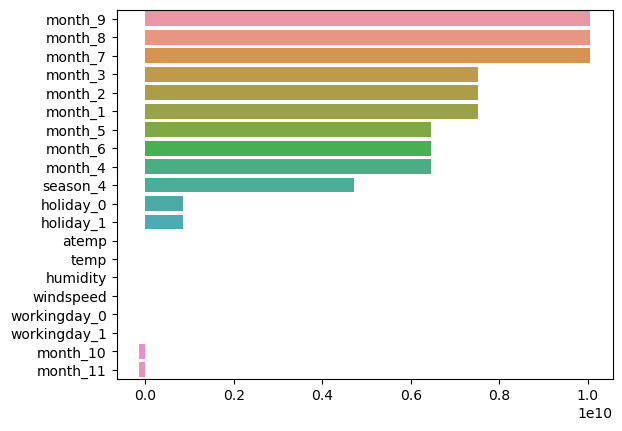

In [30]:
coef=pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort=coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [31]:
# 회귀 트리로 회귀 예측 수행
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg=RandomForestRegressor(n_estimators=500)
gbm_reg=GradientBoostingRegressor(n_estimators=500)
xgb_reg=XGBRegressor(n_estimators=500)
lgbm_reg=LGBMRegressor(n_estimators=500)
for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
    get_model_predict(model,X_train.values,X_test.values,y_train.values,y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE 0.355, RMSE 50.188, MAE 31.074
### GradientBoostingRegressor ###
RMSLE 0.330, RMSE 53.356, MAE 32.749
### XGBRegressor ###
RMSLE 0.342, RMSE 51.732, MAE 31.251
### LGBMRegressor ###
RMSLE 0.319, RMSE 47.215, MAE 29.029


## 캐글 주택 가격 실습

In [86]:
house_df_org=pd.read_csv("C:/Users/MYCOM/data/houseprice.csv")
house_df=house_df_org.copy()
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
print('data shape',house_df.shape)
print('###')
print('whole feature type \n',house_df.dtypes.value_counts())
isnull_series=house_df.isnull().sum()
print('###')
print('null columns and null size',isnull_series[isnull_series>0].sort_values(ascending=False))

data shape (1460, 81)
###
whole feature type 
 object     43
int64      35
float64     3
dtype: int64
###
null columns and null size PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Orginal Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

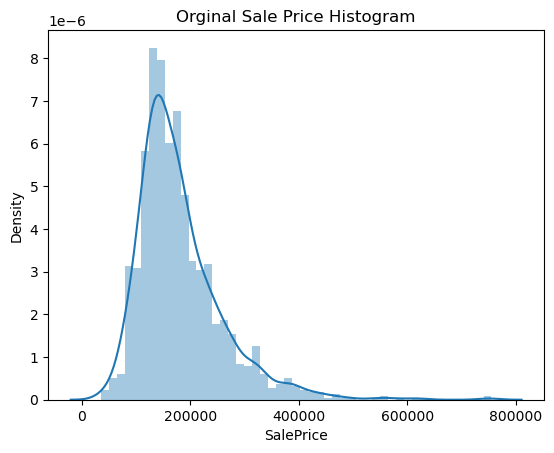

In [89]:
plt.title('Orginal Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

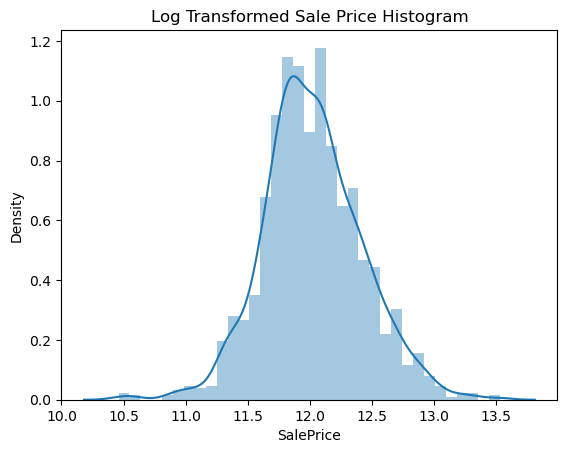

In [90]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice=np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [91]:
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [92]:
# SalePrice 로그 변환
original_SalePrice=house_df['SalePrice']
house_df['SalePrice']=np.log1p(house_df['SalePrice'])
house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
house_df.fillna(house_df.mean(),inplace=True)

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_37028\2680272550.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house_df.fillna(house_df.mean(),inplace=True)


In [93]:
null_column_count=house_df.isnull().sum()[house_df.isnull().sum()>0]
print('null feature type',house_df.dtypes[null_column_count.index])

null feature type MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [94]:
print('get dummies 수행 전',house_df.shape)
house_df_ohe=pd.get_dummies(house_df)
print('get dummies 수행 후',house_df_ohe.shape)

get dummies 수행 전 (1460, 75)
get dummies 수행 후 (1460, 271)


In [95]:
null_column_count=house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0]
print('null feature type',house_df_ohe.dtypes[null_column_count.index])

null feature type Series([], dtype: object)


In [96]:
def get_rmse(model):
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE',np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
    return rmses

In [97]:
y_target=house_df_ohe['SalePrice']
X_features=house_df_ohe.drop('SalePrice',axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=0)
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE 0.237
Ridge 로그 변환된 RMSE 0.203
Lasso 로그 변환된 RMSE 0.265


[0.23654762711418836, 0.20264744779250782, 0.2654391397907449]

In [98]:
# 피처별 회귀 계수 시각화
def get_top_bottom_coef(model,n=10):
    coef=pd.Series(model.coef_,index=X_features.columns)
    coef_high=coef.sort_values(ascending=False).head(n)
    coef_low=coef.sort_values(ascending=False).tail(n)
    return coef_high,coef_low

def visualize_coef(models):
    fig,axs=plt.subplots(figsize=(24,10),nrows=1,ncols=3)
    fig.tight_layout()
    for i_num,model in enumerate(models):
        coef_high,coef_low=get_top_bottom_coef(model)
        coef_concat=pd.concat([coef_high,coef_low])
        axs[i_num].set_title(model.__class__.__name__+'Coef',size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])

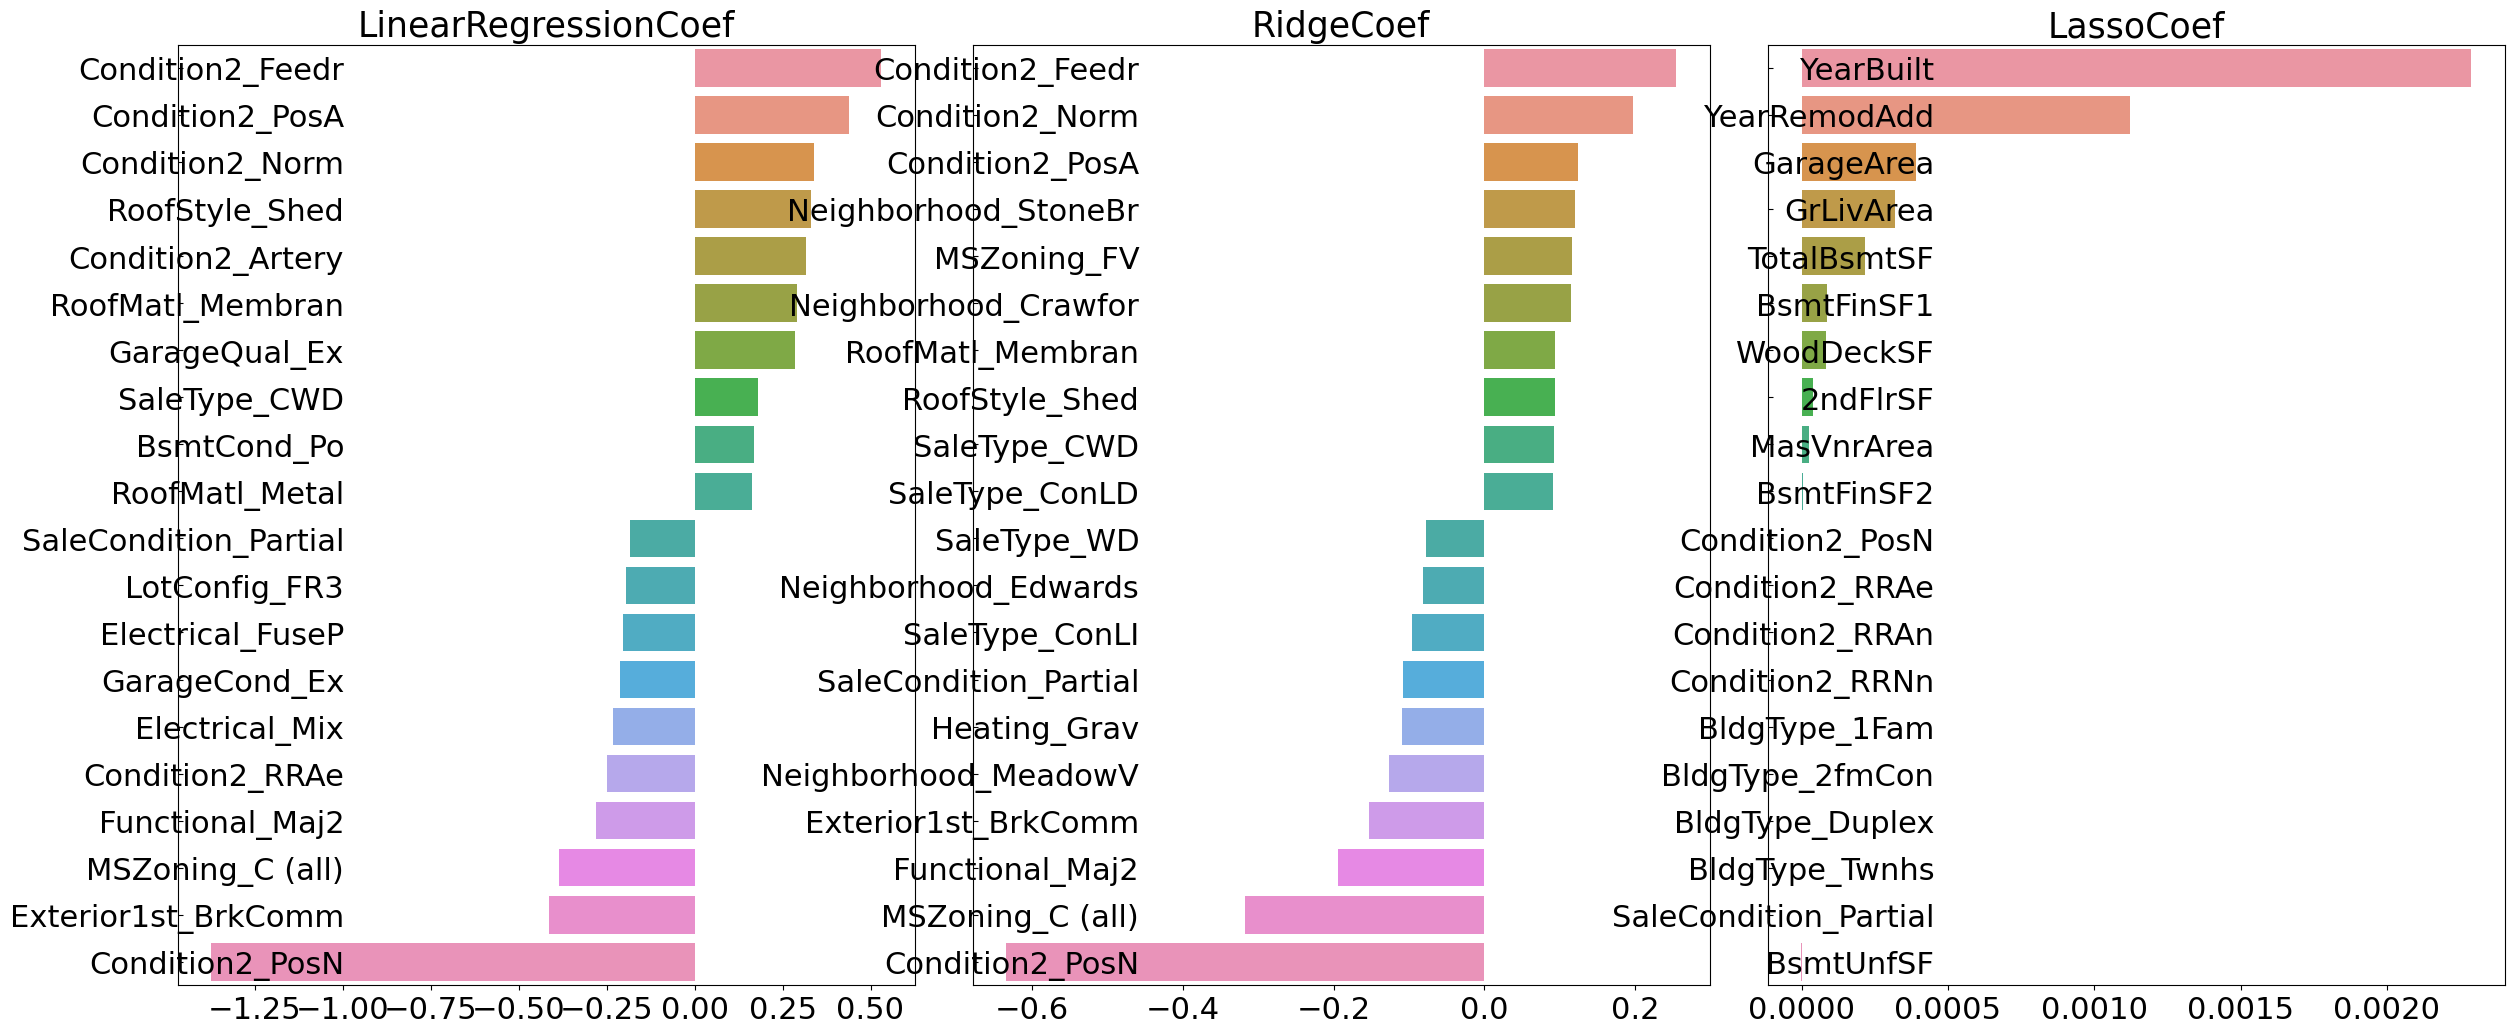

In [99]:
models=[lr_reg,ridge_reg,lasso_reg]
visualize_coef(models)

In [100]:
from sklearn.model_selection import cross_val_score
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list=np.sqrt(-cross_val_score(model,X_features,y_target,scoring='neg_mean_squared_error',cv=5))
        rmse_avg=np.mean(rmse_list)
        print('CV RMSE 리스트 {1}'.format(model.__class__.__name__,np.round(rmse_list,3)))
        print('CV 평균 RMSE 값 {1}'.format(model.__class__.__name__,np.round(rmse_avg,3)))
models=[lr_reg,ridge_reg,lasso_reg]
get_avg_rmse_cv(models)

CV RMSE 리스트 [0.135 0.165 0.168 0.111 0.198]
CV 평균 RMSE 값 0.155
CV RMSE 리스트 [0.117 0.154 0.142 0.117 0.189]
CV 평균 RMSE 값 0.144
CV RMSE 리스트 [0.161 0.204 0.177 0.181 0.265]
CV 평균 RMSE 값 0.198


In [101]:
from sklearn.model_selection import GridSearchCV
def print_best_params(model,params):
    grid_model=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_features,y_target)
    rmse=np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값 {1} 최적 alpha {2}'.format(model.__class__.__name__,np.round(rmse,4),grid_model.best_params_))

In [102]:
ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 0.1418 최적 alpha {'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값 0.142 최적 alpha {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE 0.237
Ridge 로그 변환된 RMSE 0.19
Lasso 로그 변환된 RMSE 0.201


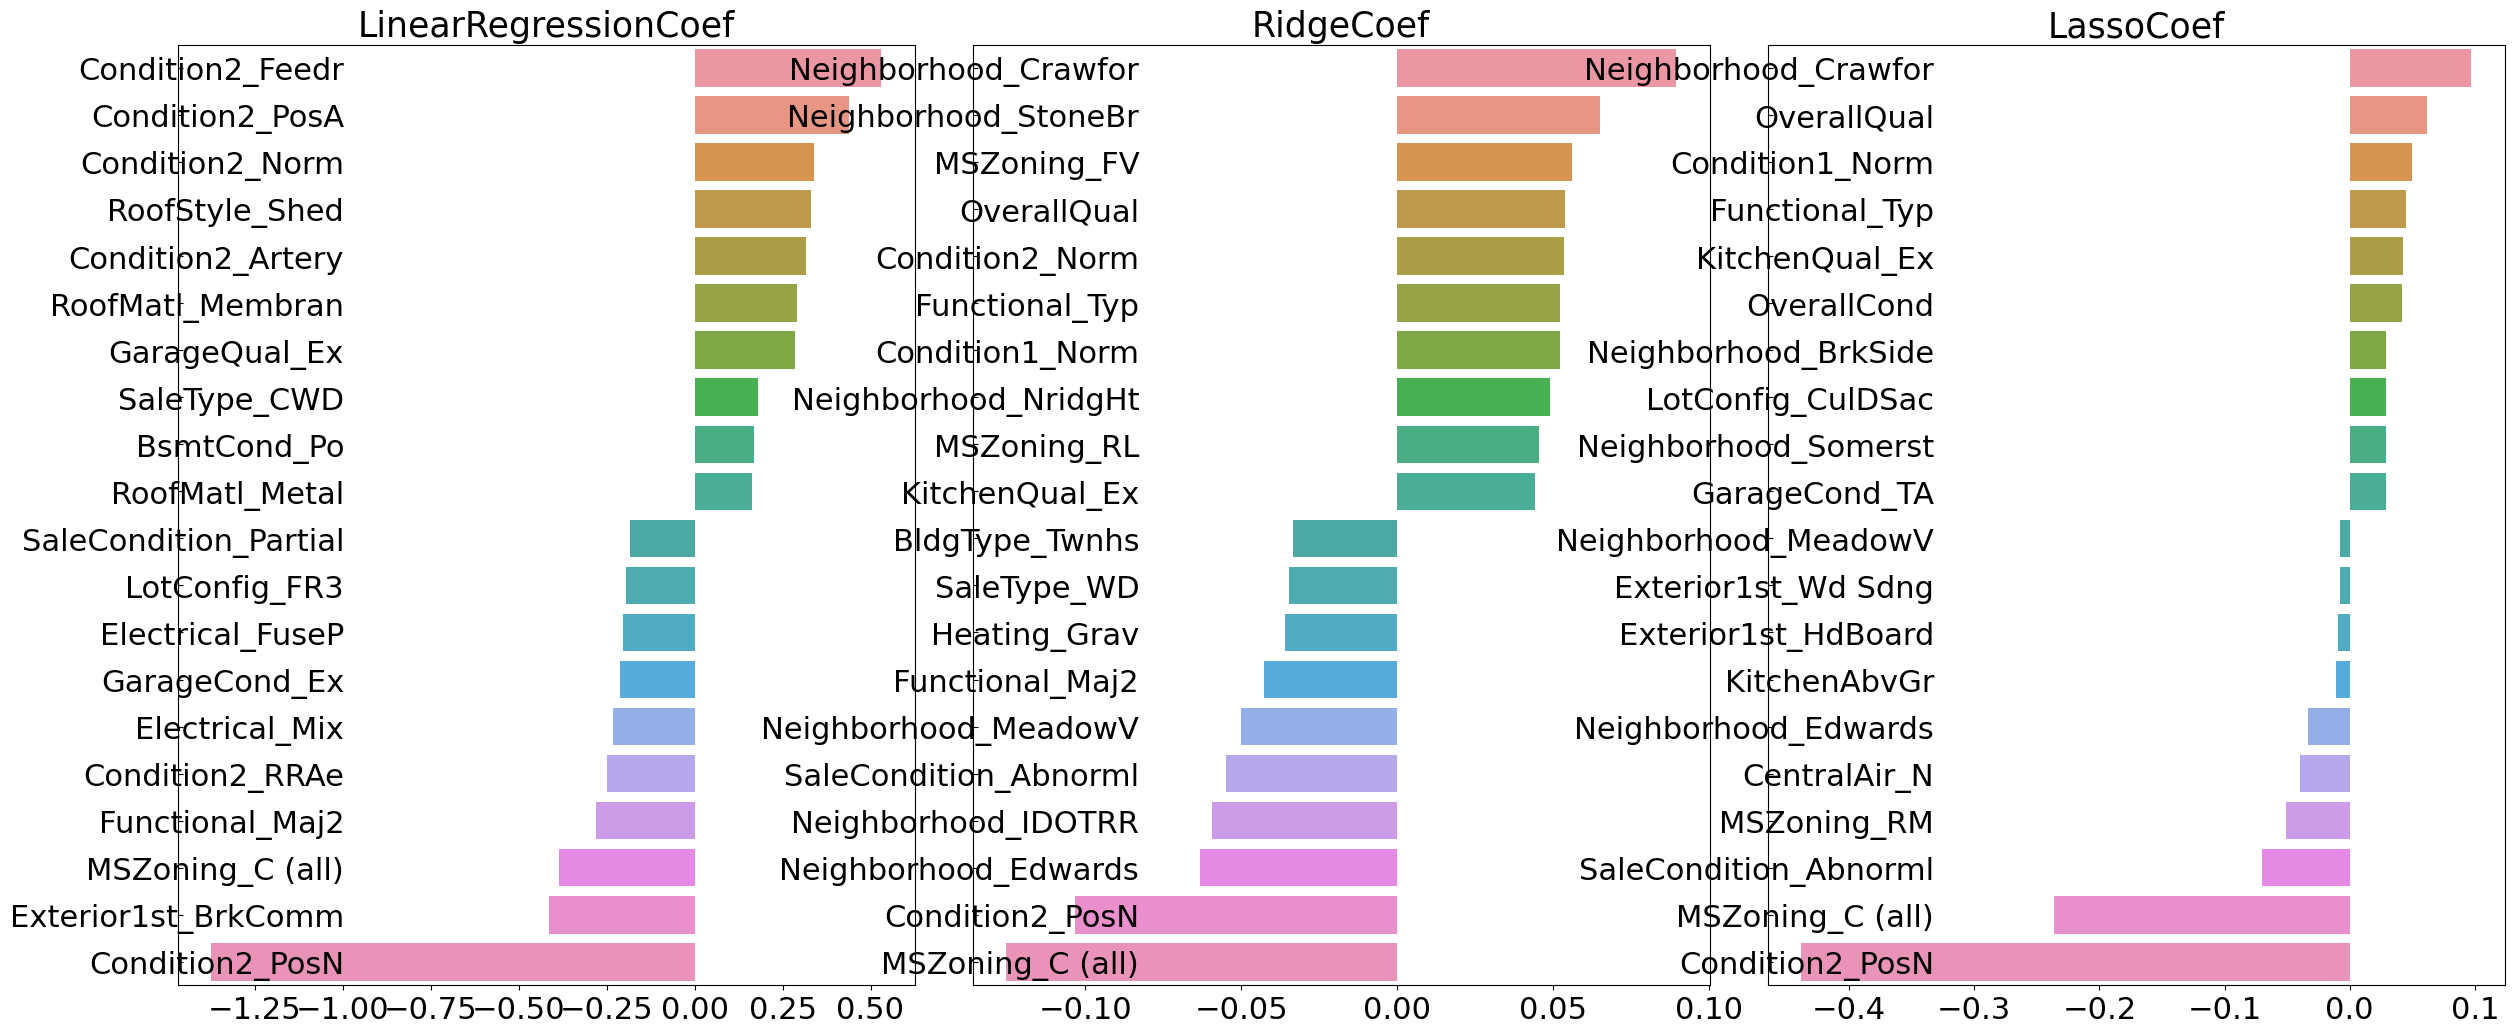

In [103]:
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge(alpha=12)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)
models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)
visualize_coef(models)

## feature 데이터 세트의 분포도 
## 왜곡된 정도 확인

In [104]:
from scipy.stats import skew
features_index=house_df.dtypes[house_df.dtypes!='object'].index
skew_features=house_df[features_index].apply(lambda x: skew(x))
skew_features_top=skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [105]:
house_df[skew_features_top.index]=np.log1p(house_df[skew_features_top.index])

In [106]:
house_df_ohe=pd.get_dummies(house_df)
y_target=house_df_ohe['SalePrice']
X_features=house_df_ohe.drop('SalePrice',axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=0)
ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
models=[lr_reg,ridge_reg,lasso_reg]
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 0.1275 최적 alpha {'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값 0.1252 최적 alpha {'alpha': 0.001}


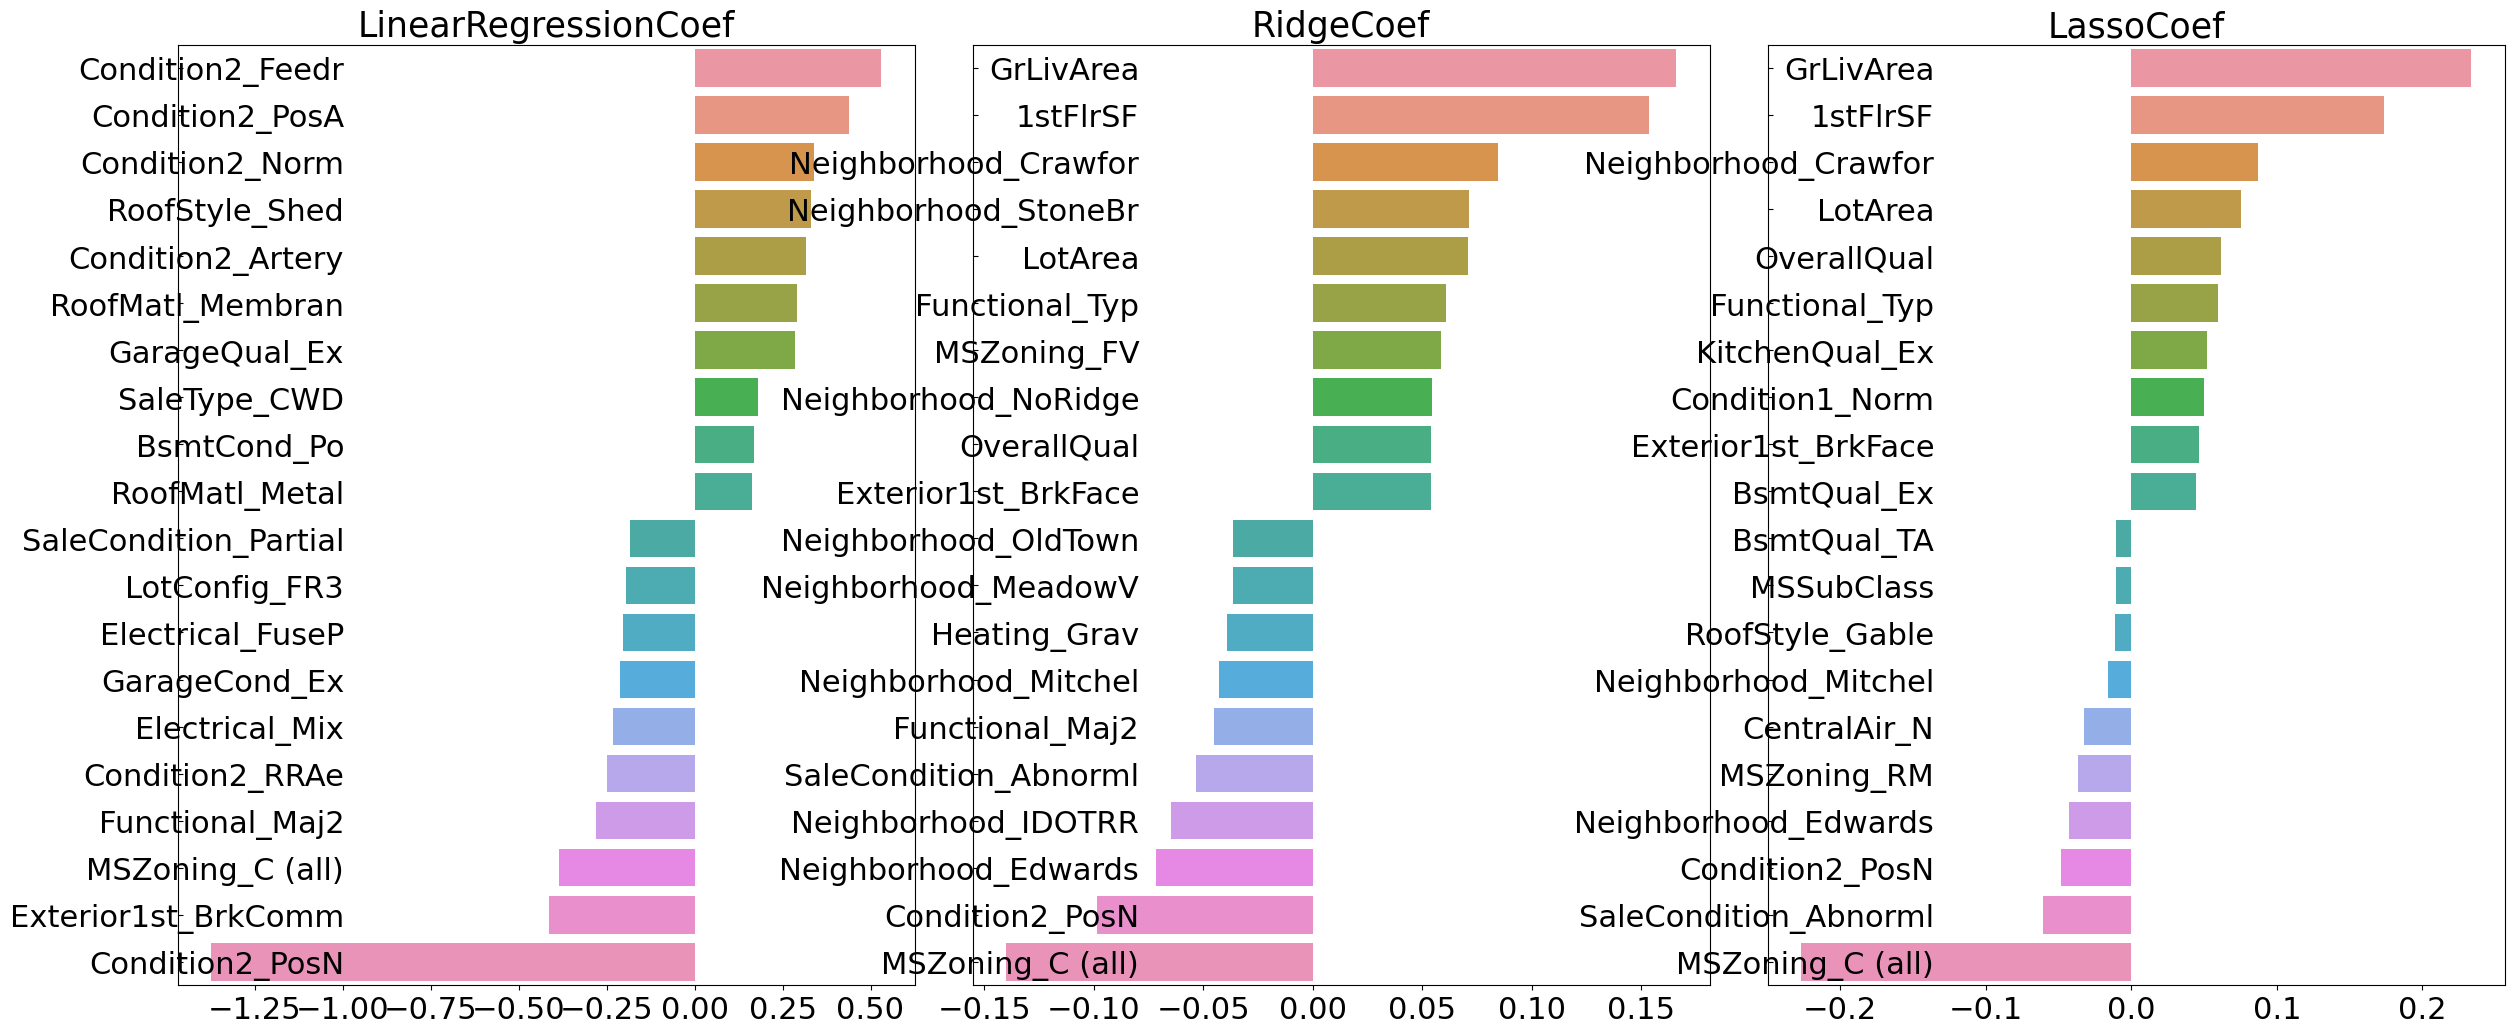

In [107]:
ridge_reg=Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)
models=[lr_reg,ridge_reg,lasso_reg]
visualize_coef(models)

## 이상치 데이터 처리

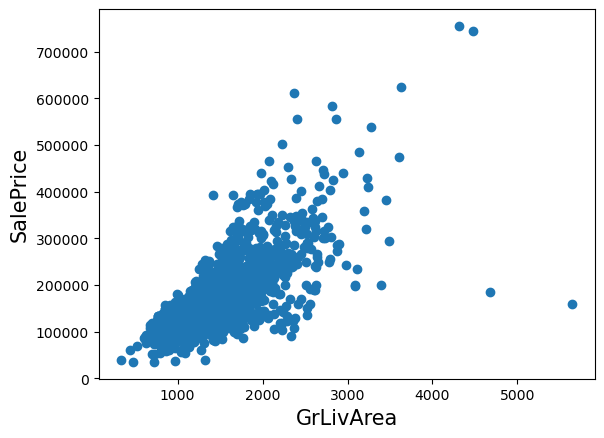

In [108]:
plt.scatter(x=house_df_org['GrLivArea'],y=house_df_org['SalePrice'])
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('GrLivArea',fontsize=15)
plt.show()

In [109]:
cond1=house_df_ohe['GrLivArea']>np.log1p(4000)
cond2=house_df_ohe['SalePrice']<np.log1p(500000)
outlier_index=house_df_ohe[cond1&cond2].index
print('outlier record index::',outlier_index.values)

outlier record index:: [ 523 1298]


In [110]:
print('outlier 삭제 전 shape::',house_df_ohe.shape)
house_df_ohe.drop(outlier_index,axis=0,inplace=True)
print('outlier 삭제 후 shape::',house_df_ohe.shape)

outlier 삭제 전 shape:: (1460, 271)
outlier 삭제 후 shape:: (1458, 271)


In [111]:
y_target=house_df_ohe['SalePrice']
X_features=house_df_ohe.drop('SalePrice',axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=0)
ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 0.1125 최적 alpha {'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값 0.1122 최적 alpha {'alpha': 0.001}


In [113]:
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE 0.106
Ridge 로그 변환된 RMSE 0.1
Lasso 로그 변환된 RMSE 0.099


[0.1060370813621816, 0.10007330586007636, 0.09923196801288281]

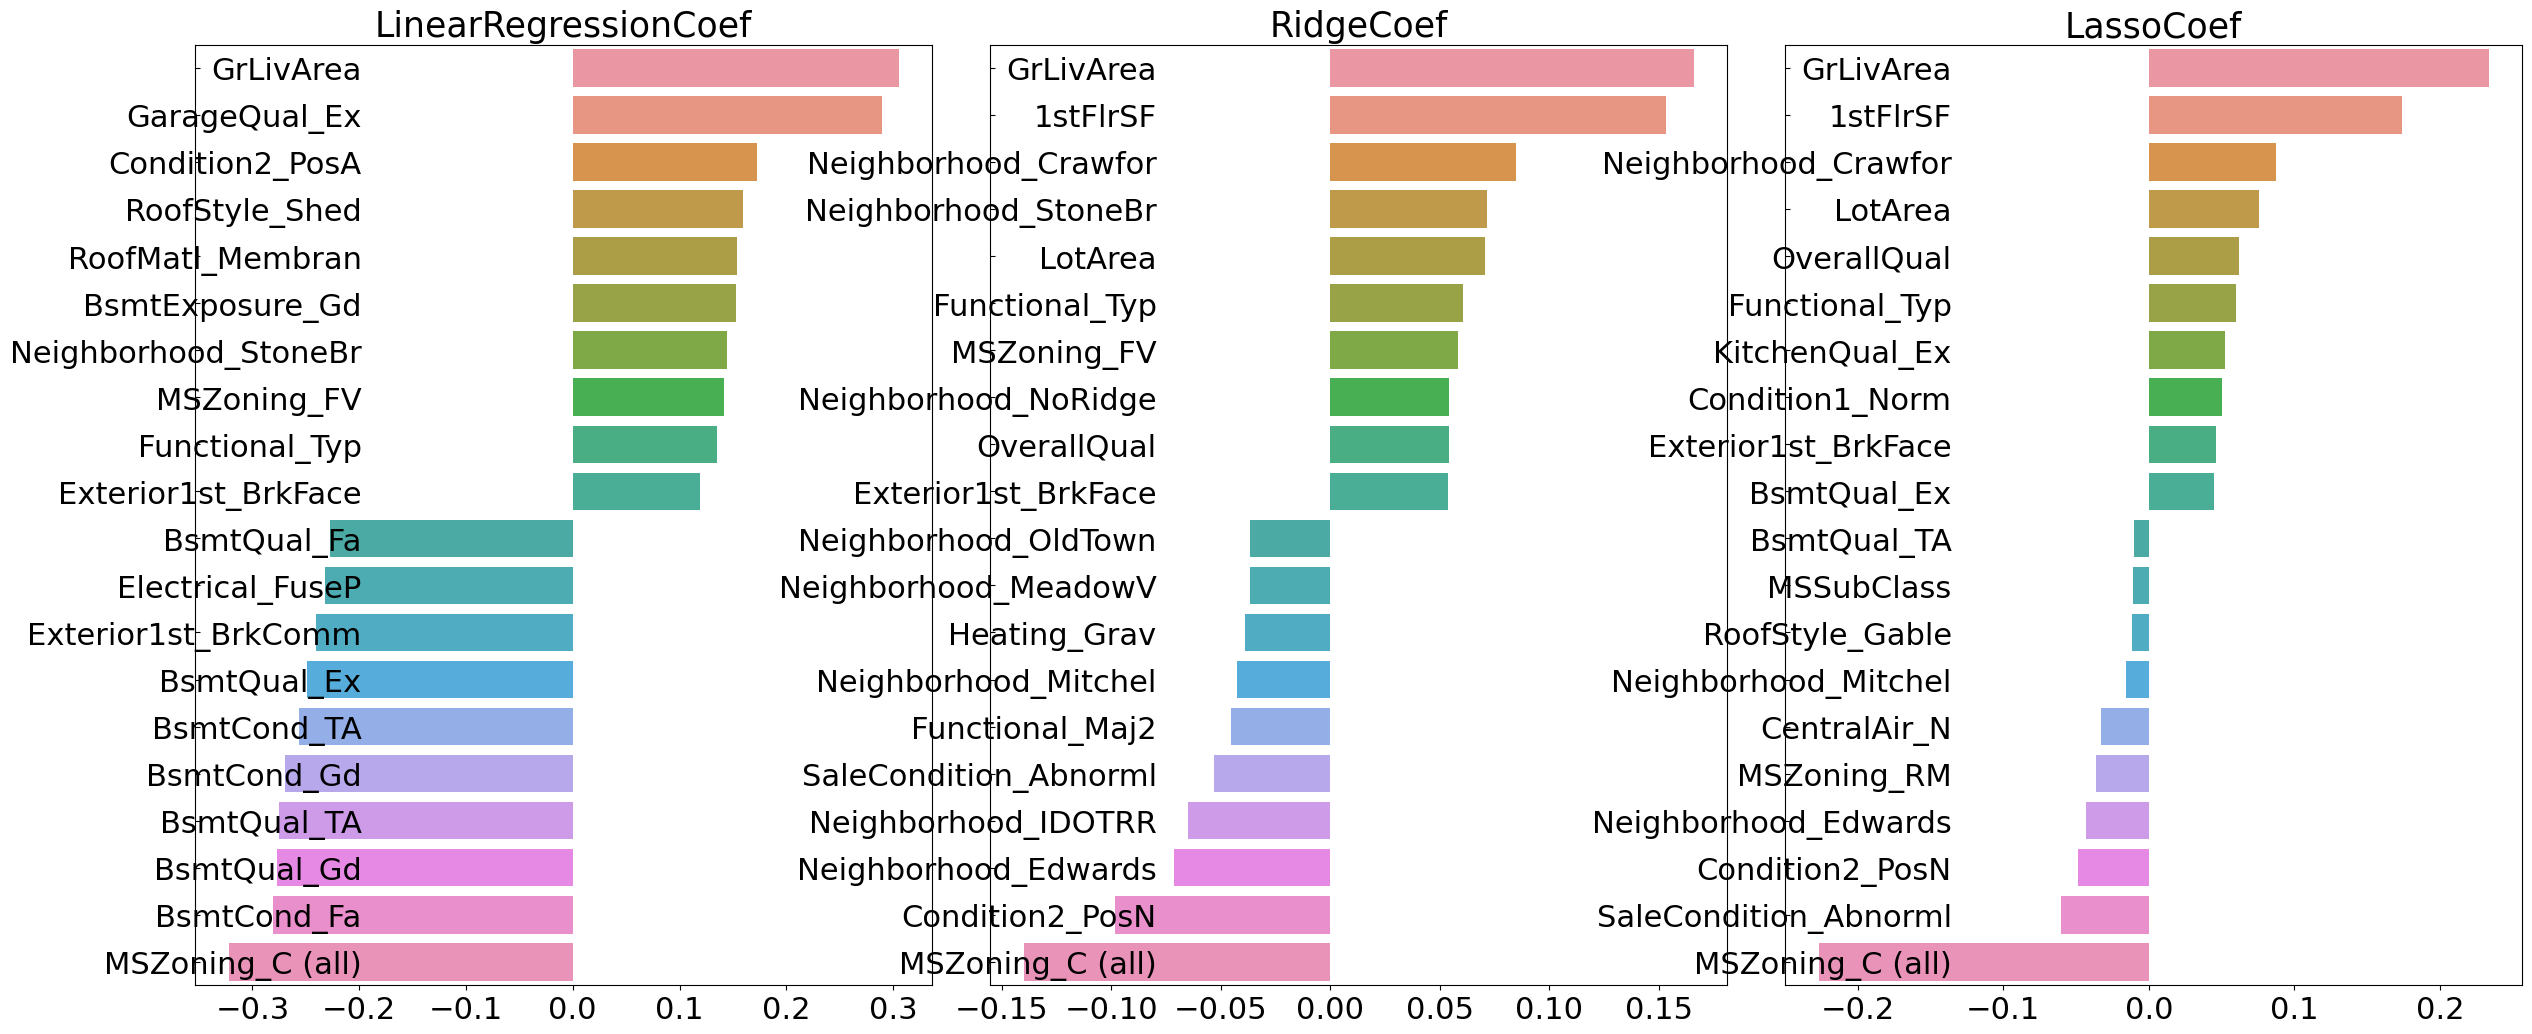

In [114]:
visualize_coef(models)

# 회귀 트리 모델 학습/평가/예측

In [115]:
from xgboost import XGBRegressor
xgb_params={'n_estimators':[1000]}
xgb_reg=XGBRegressor(n_estimators=10000,learning_rate=0.05,colsample_bytree=0.5,subsample=0.8)
print_best_params(xgb_reg,xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값 0.1171 최적 alpha {'n_estimators': 1000}


In [116]:
lgbm_params={'n_estimators':[1000]}
lgbm_reg=LGBMRegressor(n_estimators=1000,learning_rate=0.05,num_leaves=4,subsample=0.6,colsample_bytree=0.4,reg_lambda=10,n_jobs=-1)
print_best_params(lgbm_reg,lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값 0.1163 최적 alpha {'n_estimators': 1000}


## 회귀 모델의 예측 결과 혼합을 통한 최종 예측

In [119]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value=preds[key]
        mse=mean_squared_error(y_test,pred_value)
        rmse=np.sqrt(mse)
        print('{0} 모델의 RMSE {1}'.format(key,rmse))
ridge_reg=Ridge(alpha=8)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)
ridge_pred=ridge_reg.predict(X_test)
lasso_pred=lasso_reg.predict(X_test)
pred=0.4*ridge_pred+0.6*lasso_pred
preds={'최종 혼합':pred,'Ridge':ridge_pred,'Lasso':lasso_pred}
get_rmse_pred(preds)

최종 혼합 모델의 RMSE 0.10255190387981773
Ridge 모델의 RMSE 0.10611591251774186
Lasso 모델의 RMSE 0.10221126567580999


In [120]:
xgb_reg=XGBRegressor(n_estimators=1000,learning_rate=0.05,colsample_bytree=0.5,subsample=0.8)
lgbm_reg=LGBMRegressor(n_estimators=1000,learning_rate=0.05,num_leaves=4,subsample=0.6,colsample_bytree=0.4,reg_lambda=10,n_jobs=-1)
xgb_reg.fit(X_train,y_train)
lgbm_reg.fit(X_train,y_train)
xgb_pred=xgb_reg.predict(X_test)
lgbm_pred=lgbm_reg.predict(X_test)
pred=0.5*ridge_pred+0.5*lasso_pred
preds={'최종 혼합':pred,'Ridge':ridge_pred,'Lasso':lasso_pred}
get_rmse_pred(preds)

최종 혼합 모델의 RMSE 0.10289599725373537
Ridge 모델의 RMSE 0.10611591251774186
Lasso 모델의 RMSE 0.10221126567580999


## 스태킹 앙상블 모델 통한 회귀 예측

In [124]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    kf = KFold(n_splits=n_folds, shuffle=False)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  

        model.fit(X_tr , y_tr)       
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
       
    
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    return train_fold_pred , test_pred_mean

In [125]:
# get_stacking_base_datasets은 ndarray를 인자로 사용하므로 dataframe을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

In [126]:
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

In [127]:
# 스태킹 형태로 개별 모델이 반환한 데이터 세트 결합
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

In [128]:
# 최종 메타 모델은 Lasso 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

In [129]:
# 새롭게 만들어진 test 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.10186137388205871
